In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
# import matplotlib_inline
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%precision 3

# matplotlib_inline.backend_inline.set_matplotlib_formats("pdf",
#                                                         "svg",
#                                                         quality=80)
plt.style.use("ggplot")

# Problem 1

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

### Sample of the Election Dataset.

In [3]:
election_df = pd.read_excel("dataset/Election_Data.xlsx", sheet_name=1)
election_df.drop("Unnamed: 0", axis=1, inplace=True)
election_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


### Checking the types of variables in the dataset.

In [4]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


### Descriptive Statistics of the dataset

In [5]:
election_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for Duplicate rows

In [6]:
print(
    f"Number of duplicate entries in the dataset: {election_df.duplicated().sum()}"
)

Number of duplicate entries in the dataset: 8


In [7]:
election_df.drop_duplicates(inplace=True)
election_df.reset_index(inplace=True, drop=True)

In [8]:
print(
    f"Shape of the data after removing duplicate entries: {election_df.shape}")

Shape of the data after removing duplicate entries: (1517, 9)


## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

### Univariate analysis

In [9]:
def univariate_analysis_continuous(col):
    print(f"Skewness: {col.skew():.4f}\n")
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(x=col, kde=True, ax=axs[0])
    sns.boxplot(x=col, orient="h", ax=axs[1])
    plt.suptitle(f"Distribution of {col.name} variable", size=15);


def univariate_analysis_categorical(col):
    print(f"Class percentages in {col.name} variable:")
    print(f"{col.value_counts(normalize=True)}\n")
    plt.figure(figsize=(5, 5))
    sns.countplot(x=col)
    plt.title(f"Countplot of {col.name} variable", size=15);

#### vote variable

Class percentages in vote variable:
Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64



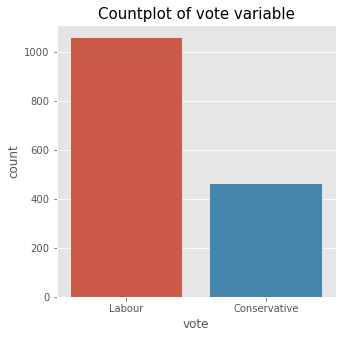

In [10]:
univariate_analysis_categorical(election_df["vote"])
# plt.savefig("images/Figure1.svg", bbox_inches="tight");

#### age variable

Skewness: 0.1398



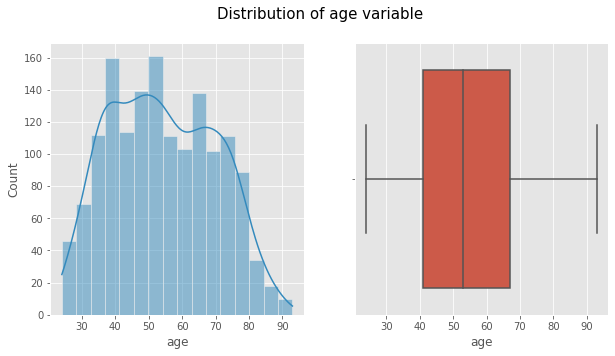

In [11]:
univariate_analysis_continuous(election_df['age'])
# plt.savefig("images/Figure2.svg", bbox_inches="tight");

#### economic.cond.national variable

Class percentages in economic.cond.national variable:
3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic.cond.national, dtype: float64



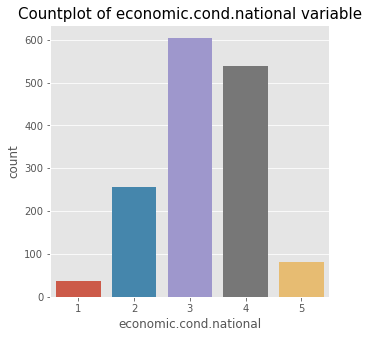

In [12]:
univariate_analysis_categorical(election_df['economic.cond.national'])
# plt.savefig("images/Figure3.svg", bbox_inches="tight");

#### economic.cond.household variable

Class percentages in economic.cond.household variable:
3    0.425181
4    0.286750
2    0.184575
5    0.060646
1    0.042848
Name: economic.cond.household, dtype: float64



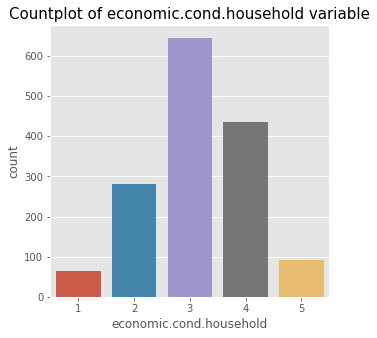

In [13]:
univariate_analysis_categorical(election_df['economic.cond.household'])
# plt.savefig("images/Figure4.svg", bbox_inches="tight");

#### Blair variable

Class percentages in Blair variable:
4    0.549110
2    0.286091
5    0.100198
1    0.063942
3    0.000659
Name: Blair, dtype: float64



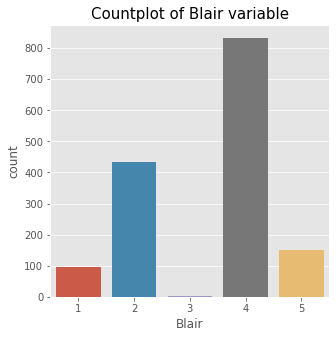

In [14]:
univariate_analysis_categorical(election_df["Blair"])
# plt.savefig("images/Figure5.svg", bbox_inches="tight");

#### Hague variable

Class percentages in Hague variable:
2    0.406724
4    0.367172
1    0.153593
5    0.048121
3    0.024390
Name: Hague, dtype: float64



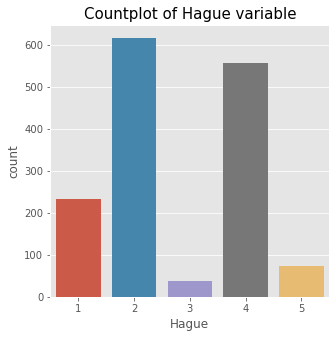

In [15]:
univariate_analysis_categorical(election_df["Hague"])
# plt.savefig("images/Figure6.svg", bbox_inches="tight");

#### Europe variable

Class percentages in Europe variable:
11    0.222808
6     0.136454
3     0.084377
4     0.083059
5     0.081081
9     0.073171
8     0.073171
1     0.071852
10    0.066579
7     0.056691
2     0.050758
Name: Europe, dtype: float64



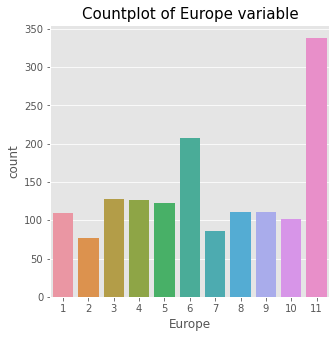

In [16]:
univariate_analysis_categorical(election_df["Europe"])
# plt.savefig("images/Figure7.svg", bbox_inches="tight");

#### political.knowledge variable

Class percentages in political.knowledge variable:
2    0.511536
0    0.299275
3    0.164140
1    0.025049
Name: political.knowledge, dtype: float64



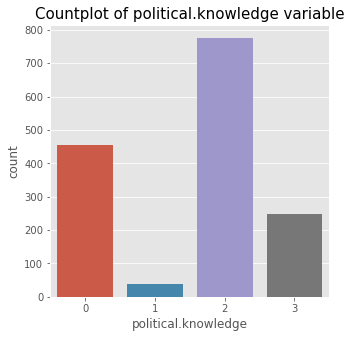

In [17]:
univariate_analysis_categorical(election_df["political.knowledge"])
# plt.savefig("images/Figure8.svg", bbox_inches="tight");

#### gender variable

Class percentages in gender variable:
female    0.53263
male      0.46737
Name: gender, dtype: float64



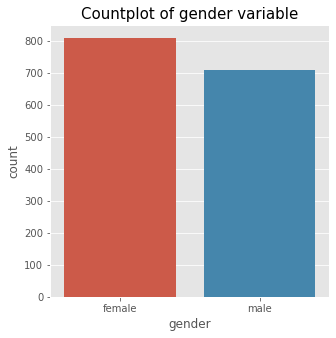

In [18]:
univariate_analysis_categorical(election_df["gender"])
# plt.savefig("images/Figure9.svg", bbox_inches="tight");

### Bivariate analysis

#### vote vs. age

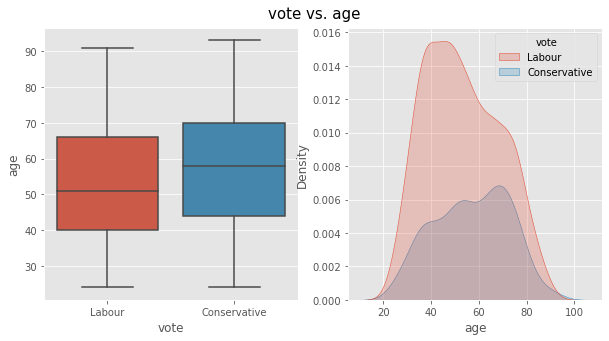

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='vote', y='age', data=election_df, ax=axs[0])
sns.kdeplot(x='age', hue='vote', data=election_df, ax=axs[1], fill=True)
plt.suptitle("vote vs. age", size=15, y=0.94);
# plt.savefig("images/Figure10.svg", bbox_inches="tight");

#### vote vs. economic.cond.national

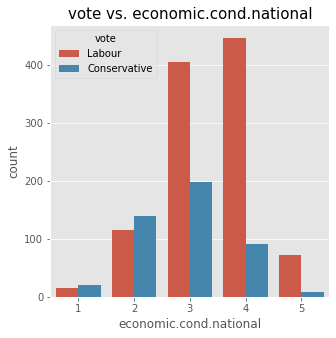

In [20]:
plt.figure(figsize=(5, 5))
sns.countplot(x='economic.cond.national', hue='vote', data=election_df)
plt.title('vote vs. economic.cond.national', size=15);
# plt.savefig("images/Figure11.svg", bbox_inches="tight");

#### vote vs. economic.cond.household

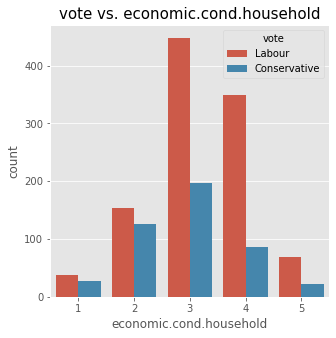

In [21]:
plt.figure(figsize=(5, 5))
sns.countplot(x='economic.cond.household', hue='vote', data=election_df)
plt.title('vote vs. economic.cond.household', size=15);
# plt.savefig("images/Figure12.svg", bbox_inches="tight");

#### vote vs. Blair

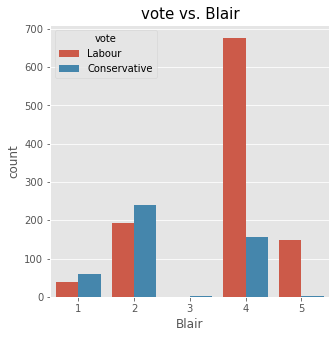

In [22]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Blair', hue='vote', data=election_df)
plt.title('vote vs. Blair', size=15);
# plt.savefig("images/Figure13.svg", bbox_inches="tight");

#### vote vs. Hague

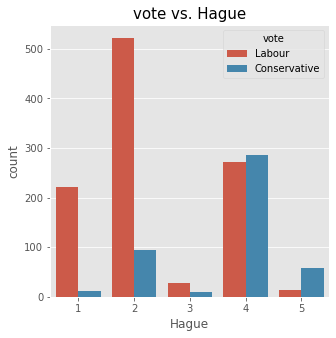

In [23]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Hague', hue='vote', data=election_df)
plt.title('vote vs. Hague', size=15);
# plt.savefig("images/Figure14.svg", bbox_inches="tight");

#### vote vs. Europe

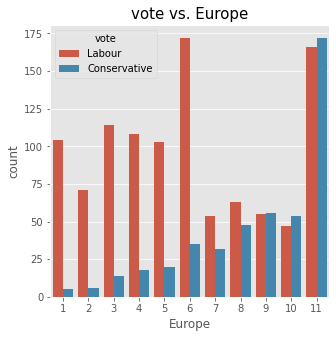

In [24]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Europe', hue='vote', data=election_df)
plt.title('vote vs. Europe', size=15);
# plt.savefig("images/Figure15.svg", bbox_inches="tight");

#### vote vs. political.knowledge

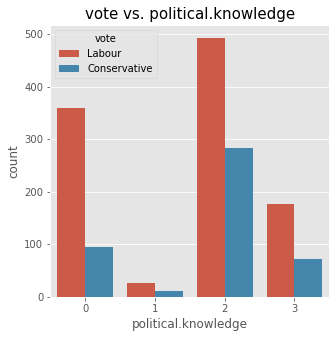

In [25]:
plt.figure(figsize=(5, 5))
sns.countplot(x='political.knowledge', hue='vote', data=election_df)
plt.title('vote vs. political.knowledge', size=15);
# plt.savefig("images/Figure16.svg", bbox_inches="tight");

#### vote vs. gender

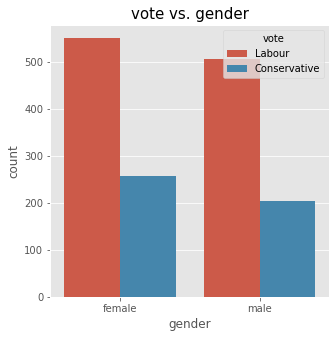

In [26]:
plt.figure(figsize=(5, 5))
sns.countplot(x='gender', hue='vote', data=election_df)
plt.title('vote vs. gender', size=15);
# plt.savefig("images/Figure17.svg", bbox_inches="tight");

### Correlation Heatmap

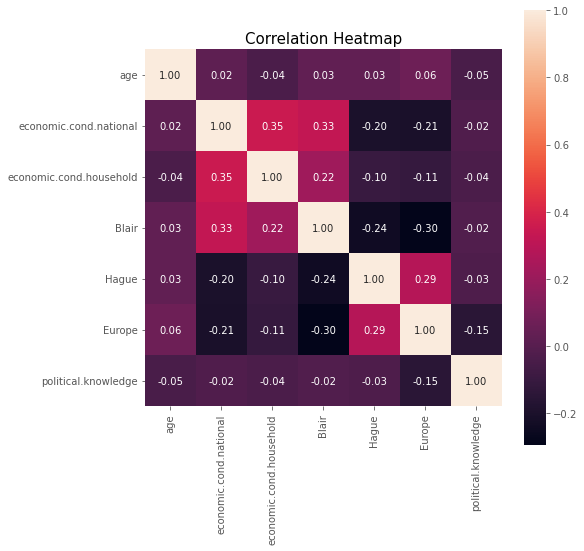

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=election_df.corr(), fmt=".2f", annot=True, square=True, ax=ax)
plt.title("Correlation Heatmap", size=15);
# plt.savefig("images/Figure18.svg", bbox_inches="tight");

### Pair Plot

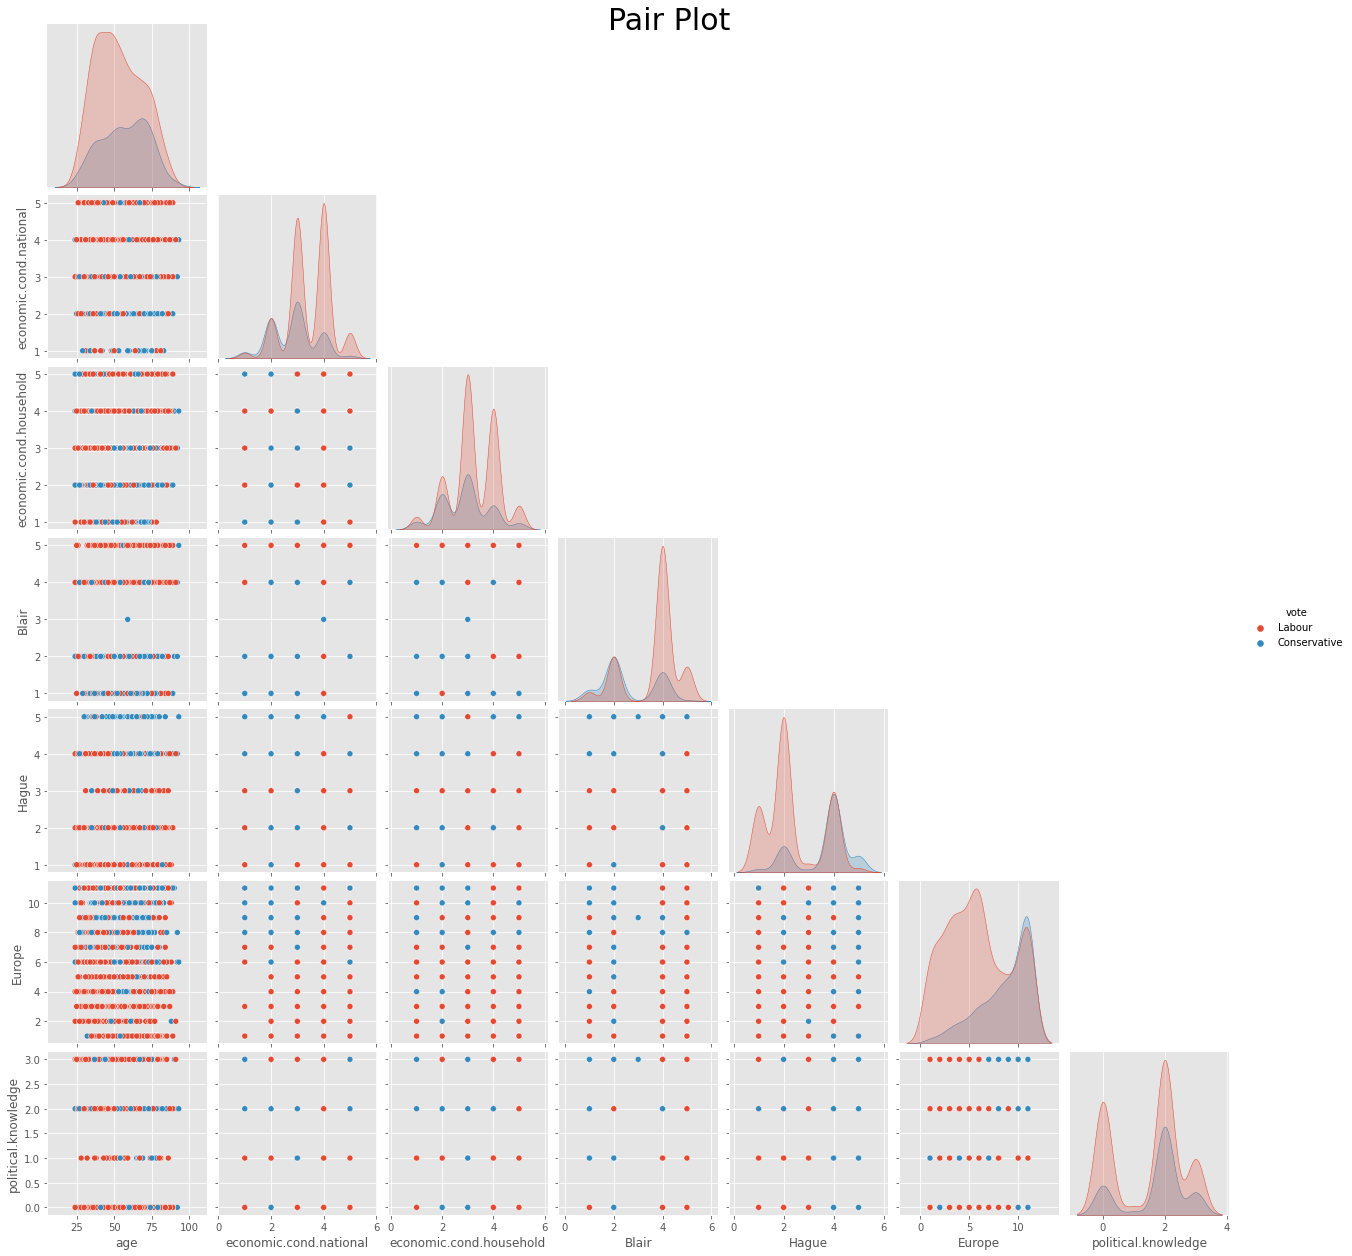

In [28]:
sns.pairplot(data=election_df, hue='vote', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot', size=30, y=1.0);
# plt.savefig("images/Figure19.svg", bbox_inches="tight");

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

### Encoding the categorical variables

In [29]:
print("Encoding for vote variable: {'Labour': 0, 'Conservative': 1}")
print("Encoding for gender variable: {'female': 0, 'male': 1}")

Encoding for vote variable: {'Labour': 0, 'Conservative': 1}
Encoding for gender variable: {'female': 0, 'male': 1}


In [30]:
election_df.vote.replace({'Labour': 0, 'Conservative': 1}, inplace=True)
election_df.gender.replace({'female': 0, 'male': 1}, inplace=True)

In [31]:
election_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


### Scaling

In [32]:
election_df.describe().loc[['mean', 'std'], :]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
mean,0.303230,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,0.467370
std,0.459805,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.499099


### Splitting the data into train and test sets

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [34]:
X = election_df.drop('vote', axis=1).copy()
y = election_df['vote'].copy()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1061, 8)
Shape of y_train: (1061,)
Shape of X_test: (456, 8)
Shape of y_test: (456,)


In [38]:
pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns).head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
635,0.463768,0.50,0.50,0.25,0.75,0.2,0.666667,0.0
1255,0.681159,0.75,0.50,0.25,0.75,1.0,0.666667,0.0
1217,0.753623,0.50,0.25,0.75,1.00,1.0,0.666667,1.0
819,0.391304,0.50,0.75,0.75,0.25,1.0,0.666667,0.0
793,0.072464,0.75,0.75,0.75,0.25,0.9,0.000000,0.0


In [39]:
print("Class proportions in y_train:")
print(f"{y_train.value_counts(normalize=True)}\n")
print("Class proportions in y_test:")
print(f"{y_test.value_counts(normalize=True)}")

Class proportions in y_train:
0    0.696513
1    0.303487
Name: vote, dtype: float64

Class proportions in y_test:
0    0.697368
1    0.302632
Name: vote, dtype: float64


## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

### Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [42]:
print(f"Accuracy score on the train set: {round(logistic_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(logistic_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.845
Accuracy score on the test set: 0.809


In [43]:
print(f"Intercept: {round(logistic_model.intercept_[0], 3)}")
for col, coef in zip(X_train.columns, logistic_model.coef_[0]):
    print(f"{col}: {round(coef, 3)}")

Intercept: -3.44
age: 0.019
economic.cond.national: -0.255
economic.cond.household: -0.118
Blair: -0.702
Hague: 0.873
Europe: 0.221
political.knowledge: 0.473
gender: 0.051


### LDA Model

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [46]:
print(f"Accuracy score on the train set: {round(lda_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(lda_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.842
Accuracy score on the test set: 0.807


In [47]:
print(f"Intercept: {round(lda_model.intercept_[0], 3)}")
for col, coef in zip(X_train.columns, lda_model.coef_[0]):
    print(f"{col}: {round(coef, 3)}")

Intercept: -3.87
age: 0.023
economic.cond.national: -0.276
economic.cond.household: -0.119
Blair: -0.855
Hague: 1.026
Europe: 0.239
political.knowledge: 0.557
gender: 0.074


## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

### KNN Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [50]:
print(f"Accuracy score on the train set: {round(knn_model.score(X_train_scaled, y_train), 3)}")
print(f"Accuracy score on the test set: {round(knn_model.score(X_test_scaled, y_test), 3)}")

Accuracy score on the train set: 0.86
Accuracy score on the test set: 0.803


### Naive Bayes' Model

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [53]:
print(f"Accuracy score on the train set: {round(nb_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(nb_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.835
Accuracy score on the test set: 0.82


## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Model Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression Model

In [55]:
param_grid = {
    "solver": ['liblinear'],
    "penalty": ['l1'],
    "C": [0.2, 0.3, 0.4],
}

In [56]:
lr_grid_cv = GridSearchCV(estimator=LogisticRegression(random_state=1,
                                                       n_jobs=4,
                                                       max_iter=100000,
                                                       tol=1e-6),
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=-1,
                          scoring="f1")
lr_grid_cv.fit(X_train.values, y_train.values)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=100000, n_jobs=4,
                                          random_state=1, tol=1e-06),
             n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='f1')

In [57]:
lr_grid_cv.best_params_

{'C': 0.300, 'penalty': 'l1', 'solver': 'liblinear'}

In [58]:
lr_model = lr_grid_cv.best_estimator_

In [59]:
print(f"Accuracy score on the train set: {round(lr_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(lr_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.844
Accuracy score on the test set: 0.807


In [60]:
print(f"Intercept: {lr_model.intercept_[0]:.3f}")
for i, col in enumerate(X.columns):
    print(f"{col}: {lr_model.coef_[0][i]:.3f}")

Intercept: -2.096
age: 0.013
economic.cond.national: -0.313
economic.cond.household: -0.171
Blair: -0.713
Hague: 0.793
Europe: 0.195
political.knowledge: 0.395
gender: 0.000


#### LDA Model

In [61]:
param_grid = {
    "solver": ['svd'],
}

In [62]:
lda_grid_cv = GridSearchCV(estimator=LinearDiscriminantAnalysis(),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring="f1")
lda_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd']}, scoring='f1')

In [63]:
lda_grid_cv.best_params_

{'solver': 'svd'}

In [64]:
lda_model = lda_grid_cv.best_estimator_

In [65]:
print(f"Accuracy score on the train set: {round(lda_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(lda_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.842
Accuracy score on the test set: 0.807


In [66]:
print(f"Intercept: {lda_model.intercept_[0]:.3f}")
for i, col in enumerate(X.columns):
    print(f"{col}: {lda_model.coef_[0][i]:.3f}")

Intercept: -3.870
age: 0.023
economic.cond.national: -0.276
economic.cond.household: -0.119
Blair: -0.855
Hague: 1.026
Europe: 0.239
political.knowledge: 0.557
gender: 0.074


#### KNN Model

In [67]:
param_grid = {
    "n_neighbors": [9],
    "p": [1, 2],
    "weights": ['uniform'],
    "metric": ['minkowski'],
}

In [68]:
knn_grid_cv = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring="f1")
knn_grid_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': [9],
                         'p': [1, 2], 'weights': ['uniform']},
             scoring='f1')

In [69]:
knn_grid_cv.best_params_

{'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

In [70]:
knn_model = knn_grid_cv.best_estimator_

In [71]:
print(f"Accuracy score on the train set: {round(knn_model.score(X_train_scaled, y_train), 3)}")
print(f"Accuracy score on the test set: {round(knn_model.score(X_test_scaled, y_test), 3)}")

Accuracy score on the train set: 0.855
Accuracy score on the test set: 0.822


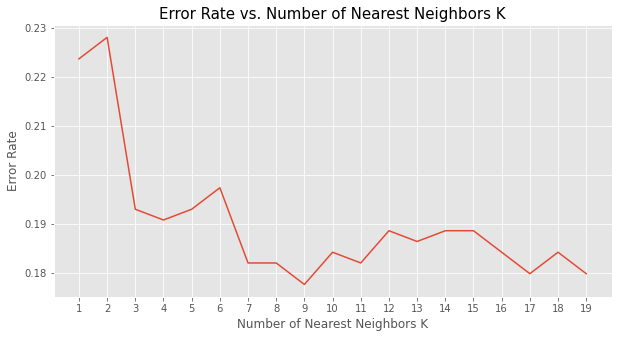

In [72]:
error = np.zeros(19)
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error[i-1] = np.mean(pred_i != y_test)

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 20), y=error)
plt.title('Error Rate vs. Number of Nearest Neighbors K', size=15)
plt.xlabel('Number of Nearest Neighbors K')
plt.xticks(ticks=range(1, 20))
plt.ylabel('Error Rate');
# plt.savefig("images/Figure20.svg", bbox_inches="tight");

#### Naive Bayes' Model

In [73]:
param_grid = {}

In [74]:
nb_grid_cv = GridSearchCV(estimator=GaussianNB(),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring="f1")
nb_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='f1')

In [75]:
nb_model = nb_grid_cv.best_estimator_

In [76]:
print(f"Accuracy score on the train set: {round(nb_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(nb_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.835
Accuracy score on the test set: 0.82


### Bagging

#### Bagging Classifier

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
param_grid = {
    "n_estimators": [190, 200, 210],
    "max_samples": [0.6, 0.7, 0.8],
    "max_features": [0.7, 0.8, 0.9]
}

In [79]:
bag_grid_cv = GridSearchCV(estimator=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),
    oob_score=True,
    random_state=1,
    n_jobs=-1),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring="f1")
bag_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                         n_jobs=-1, oob_score=True,
                                         random_state=1),
             n_jobs=-1,
             param_grid={'max_features': [0.7, 0.8, 0.9],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [190, 200, 210]},
             scoring='f1')

In [80]:
bag_grid_cv.best_params_

{'max_features': 0.800, 'max_samples': 0.700, 'n_estimators': 200}

In [81]:
bag_model = bag_grid_cv.best_estimator_

In [82]:
print(f"Accuracy score on the train set: {round(bag_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(bag_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.849
Accuracy score on the test set: 0.811


#### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
param_grid = {
    "n_estimators": [170, 180, 190],
    "max_samples": [0.9, 1.0],
    "max_features": [0.5, 0.6],
    "min_samples_leaf": [3, 4, 5],
    "min_samples_split": [20, 30, 40],
    "max_depth": [3, 4]
}

In [85]:
rf_grid_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=6,
                          scoring="f1")
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=6,
             param_grid={'max_depth': [3, 4], 'max_features': [0.5, 0.6],
                         'max_samples': [0.9, 1.0],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [170, 180, 190]},
             scoring='f1')

In [86]:
rf_grid_cv.best_params_

{'max_depth': 4,
 'max_features': 0.500,
 'max_samples': 1.000,
 'min_samples_leaf': 4,
 'min_samples_split': 30,
 'n_estimators': 180}

In [87]:
rf_model = rf_grid_cv.best_estimator_

In [88]:
print(f"Accuracy score on the train set: {round(rf_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(rf_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.855
Accuracy score on the test set: 0.814


In [89]:
pd.DataFrame(data=rf_model.feature_importances_,
             index=X_train.columns,
             columns=['Imp']).sort_values(ascending=False, by='Imp')

,Imp
Hague,0.397144
Blair,0.268339
Europe,0.157281
political.knowledge,0.084654
age,0.040404
economic.cond.national,0.037823
economic.cond.household,0.013015
gender,0.001341


### Boosting

#### AdaBoost Classifier

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
param_grid = {
    "n_estimators": [90, 100, 110],
    "learning_rate": [0.2, 0.3, 0.4]
}

In [92]:
ada_grid_cv = GridSearchCV(estimator=AdaBoostClassifier(random_state=1),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring="f1")
ada_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'n_estimators': [90, 100, 110]},
             scoring='f1')

In [93]:
ada_grid_cv.best_params_

{'learning_rate': 0.300, 'n_estimators': 100}

In [94]:
ada_model = ada_grid_cv.best_estimator_

In [95]:
print(f"Accuracy score on the train set: {round(ada_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(ada_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.852
Accuracy score on the test set: 0.811


In [96]:
pd.DataFrame(data=ada_model.feature_importances_,
             index=X_train.columns,
             columns=['Imp']).sort_values(ascending=False, by='Imp')

,Imp
age,0.30
Blair,0.17
Hague,0.16
Europe,0.10
economic.cond.national,0.09
economic.cond.household,0.08
political.knowledge,0.08
gender,0.02


#### Gradient Boosting Classifier

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
param_grid = {
    "n_estimators": [90],
    "learning_rate": [0.1],
    "loss": ['log_loss'],
    "min_samples_leaf": [5, 10, 20],
    "min_samples_split": [10, 20, 30],
    "subsample": [0.5],
    "max_depth": [1, 3, 5],
    "max_features": ['sqrt', 'log2']
}

In [99]:
gb_grid_cv = GridSearchCV(estimator=GradientBoostingClassifier(
    random_state=1, n_iter_no_change=10),
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=-1,
                          scoring="f1")
gb_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_iter_no_change=10,
                                                  random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'loss': ['log_loss'],
                         'max_depth': [1, 3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [90], 'subsample': [0.5]},
             scoring='f1')

In [100]:
gb_grid_cv.best_params_

{'learning_rate': 0.100,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 90,
 'subsample': 0.500}

In [101]:
gb_model = gb_grid_cv.best_estimator_

In [102]:
print(f"Accuracy score on the train set: {round(gb_model.score(X_train, y_train), 3)}")
print(f"Accuracy score on the test set: {round(gb_model.score(X_test, y_test), 3)}")

Accuracy score on the train set: 0.857
Accuracy score on the test set: 0.827


In [103]:
pd.DataFrame(data=gb_model.feature_importances_,
             index=X_train.columns,
             columns=['Imp']).sort_values(ascending=False, by='Imp')

,Imp
Hague,0.315240
Europe,0.191233
Blair,0.174736
political.knowledge,0.095588
economic.cond.national,0.083408
age,0.082087
economic.cond.household,0.048284
gender,0.009423


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [104]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)

### Performance Metrics for Logistic Regression Model.

#### Accuracy Score for Training and Testing

In [105]:
print(
    f"Training Accuracy score for the Logistic Regression model: {accuracy_score(y_train, lr_model.predict(X_train)):.3f}"
)

Training Accuracy score for the Logistic Regression model: 0.844


In [106]:
print(
    f"Testing Accuracy score for the Logistic Regression model: {accuracy_score(y_test, lr_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the Logistic Regression model: 0.807


#### Confusion Matrix for Training and Testing

In [107]:
print("Confusion matrix of the train set for the Logistic Regression model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, lr_model.predict(X_train)))}")

Confusion matrix of the train set for the Logistic Regression model:
     0    1
0  679   60
1  106  216


In [108]:
print("Confusion matrix of the test set for the Logistic Regression model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, lr_model.predict(X_test)))}")

Confusion matrix of the test set for the Logistic Regression model:
     0   1
0  276  42
1   46  92


#### ROC AUC Score and the ROC for Training and Testing

In [109]:
print(
    f"ROC AUC score of train data for the Logistic Regression model: {roc_auc_score(y_train, lr_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the Logistic Regression model: {roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the Logistic Regression model: 0.894
ROC AUC score of test data for the Logistic Regression model: 0.876


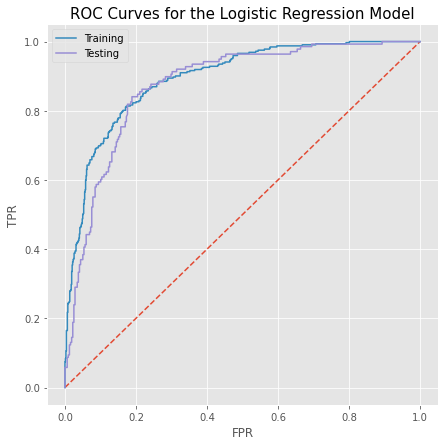

In [110]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train,
                                    lr_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the Logistic Regression Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure21.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [111]:
print(
    "Classification report of the train data for the Logistic Regression model:"
)
print(classification_report(y_train, lr_model.predict(X_train)))

Classification report of the train data for the Logistic Regression model:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       739
           1       0.78      0.67      0.72       322

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [112]:
print(
    "Classification report of the test data for the Logistic Regression model:"
)
print(classification_report(y_test, lr_model.predict(X_test)))

Classification report of the test data for the Logistic Regression model:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       318
           1       0.69      0.67      0.68       138

    accuracy                           0.81       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



### Performance Metrics for LDA Model.

#### Accuracy Score for Training and Testing

In [113]:
print(
    f"Training Accuracy score for the LDA model: {accuracy_score(y_train, lda_model.predict(X_train)):.3f}"
)

Training Accuracy score for the LDA model: 0.842


In [114]:
print(
    f"Testing Accuracy score for the LDA model: {accuracy_score(y_test, lda_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the LDA model: 0.807


#### Confusion Matrix for Training and Testing

In [115]:
print("Confusion matrix of the train set for the LDA model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, lda_model.predict(X_train)))}")

Confusion matrix of the train set for the LDA model:
     0    1
0  671   68
1  100  222


In [116]:
print("Confusion matrix of the test set for the LDA model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, lda_model.predict(X_test)))}")

Confusion matrix of the test set for the LDA model:
     0   1
0  273  45
1   43  95


#### ROC AUC Score and the ROC for Training and Testing

In [117]:
print(
    f"ROC AUC score of train data for the LDA model: {roc_auc_score(y_train, lda_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the LDA model: {roc_auc_score(y_test, lda_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the LDA model: 0.894
ROC AUC score of test data for the LDA model: 0.873


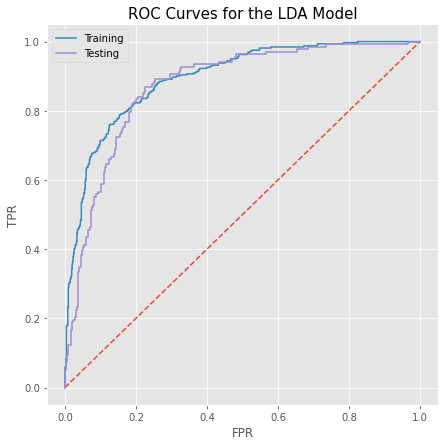

In [118]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train,
                                    lda_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, lda_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the LDA Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure22.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [119]:
print(
    "Classification report of the train data for the LDA model:"
)
print(classification_report(y_train, lda_model.predict(X_train)))

Classification report of the train data for the LDA model:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       739
           1       0.77      0.69      0.73       322

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [120]:
print(
    "Classification report of the test data for the LDA model:"
)
print(classification_report(y_test, lda_model.predict(X_test)))

Classification report of the test data for the LDA model:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       318
           1       0.68      0.69      0.68       138

    accuracy                           0.81       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



### Performance Metrics for KNN Model.

#### Accuracy Score for Training and Testing

In [121]:
print(
    f"Training Accuracy score for the KNN model: {accuracy_score(y_train, knn_model.predict(X_train_scaled)):.3f}"
)

Training Accuracy score for the KNN model: 0.855


In [122]:
print(
    f"Testing Accuracy score for the KNN model: {accuracy_score(y_test, knn_model.predict(X_test_scaled)):.3f}"
)

Testing Accuracy score for the KNN model: 0.822


#### Confusion Matrix for Training and Testing

In [123]:
print("Confusion matrix of the train set for the KNN model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, knn_model.predict(X_train_scaled)))}")

Confusion matrix of the train set for the KNN model:
     0    1
0  679   60
1   94  228


In [124]:
print("Confusion matrix of the test set for the KNN model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, knn_model.predict(X_test_scaled)))}")

Confusion matrix of the test set for the KNN model:
     0   1
0  279  39
1   42  96


#### ROC AUC Score and the ROC for Training and Testing

In [125]:
print(
    f"ROC AUC score of train data for the KNN model: {roc_auc_score(y_train, knn_model.predict_proba(X_train_scaled)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the KNN model: {roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1]):.3f}"
)

ROC AUC score of train data for the KNN model: 0.920
ROC AUC score of test data for the KNN model: 0.869


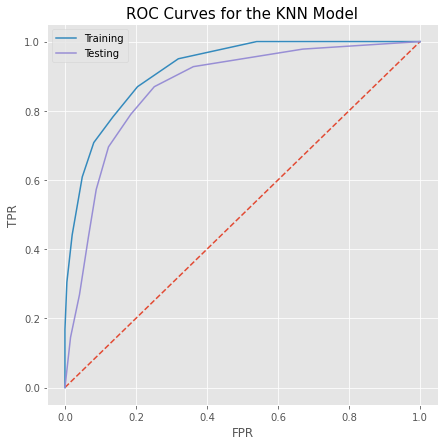

In [126]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train,
                                    knn_model.predict_proba(X_train_scaled)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the KNN Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure23.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [127]:
print(
    "Classification report of the train data for the KNN model:"
)
print(classification_report(y_train, knn_model.predict(X_train_scaled)))

Classification report of the train data for the KNN model:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       739
           1       0.79      0.71      0.75       322

    accuracy                           0.85      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [128]:
print(
    "Classification report of the test data for the KNN model:"
)
print(classification_report(y_test, knn_model.predict(X_test_scaled)))

Classification report of the test data for the KNN model:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       318
           1       0.71      0.70      0.70       138

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



### Performance Metrics for Naive Bayes' Model.

#### Accuracy Score for Training and Testing

In [129]:
print(
    f"Training Accuracy score for the Naive Bayes' model: {accuracy_score(y_train, nb_model.predict(X_train)):.3f}"
)

Training Accuracy score for the Naive Bayes' model: 0.835


In [130]:
print(
    f"Testing Accuracy score for the Naive Bayes' model: {accuracy_score(y_test, nb_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the Naive Bayes' model: 0.820


#### Confusion Matrix for Training and Testing

In [131]:
print("Confusion matrix of the train set for the Naive Bayes' model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, nb_model.predict(X_train)))}")

Confusion matrix of the train set for the Naive Bayes' model:
     0    1
0  658   81
1   94  228


In [132]:
print("Confusion matrix of the test set for the Naive Bayes' model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, nb_model.predict(X_test)))}")

Confusion matrix of the test set for the Naive Bayes' model:
     0    1
0  272   46
1   36  102


#### ROC AUC Score and the ROC for Training and Testing

In [133]:
print(
    f"ROC AUC score of train data for the Naive Bayes' model: {roc_auc_score(y_train, nb_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the Naive Bayes' model: {roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the Naive Bayes' model: 0.890
ROC AUC score of test data for the Naive Bayes' model: 0.877


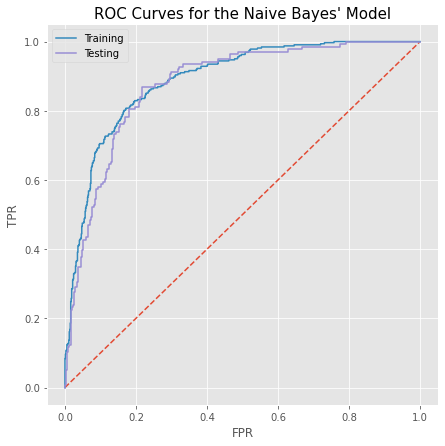

In [134]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train,
                                    nb_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the Naive Bayes' Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure24.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [135]:
print(
    "Classification report of the train data for the Naive Bayes' model:"
)
print(classification_report(y_train, nb_model.predict(X_train)))

Classification report of the train data for the Naive Bayes' model:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       739
           1       0.74      0.71      0.72       322

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [136]:
print(
    "Classification report of the test data for the Naive Bayes' model:"
)
print(classification_report(y_test, nb_model.predict(X_test)))

Classification report of the test data for the Naive Bayes' model:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.69      0.74      0.71       138

    accuracy                           0.82       456
   macro avg       0.79      0.80      0.79       456
weighted avg       0.82      0.82      0.82       456



### Performance Metrics for Bagging Classifier Model.

#### Accuracy Score for Training and Testing

In [137]:
print(
    f"Training Accuracy score for the Bagging Classifier model: {accuracy_score(y_train, bag_model.predict(X_train)):.3f}"
)

Training Accuracy score for the Bagging Classifier model: 0.849


In [138]:
print(
    f"Testing Accuracy score for the Bagging Classifier model: {accuracy_score(y_test, bag_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the Bagging Classifier model: 0.811


#### Confusion Matrix for Training and Testing

In [139]:
print("Confusion matrix of the train set for the Bagging Classifier model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, bag_model.predict(X_train)))}")

Confusion matrix of the train set for the Bagging Classifier model:
     0    1
0  691   48
1  112  210


In [140]:
print("Confusion matrix of the test set for the Bagging Classifier model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, bag_model.predict(X_test)))}")

Confusion matrix of the test set for the Bagging Classifier model:
     0   1
0  284  34
1   52  86


#### ROC AUC Score and the ROC for Training and Testing

In [141]:
print(
    f"ROC AUC score of train data for the Bagging Classifier' model: {roc_auc_score(y_train, bag_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the Bagging Classifier model: {roc_auc_score(y_test, bag_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the Bagging Classifier' model: 0.910
ROC AUC score of test data for the Bagging Classifier model: 0.880


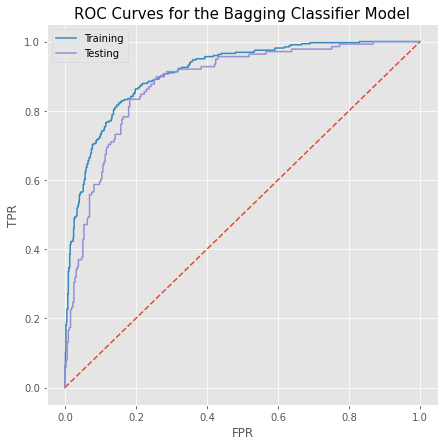

In [142]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train,
                                    bag_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, bag_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the Bagging Classifier Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure25.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [143]:
print(
    "Classification report of the train data for the Bagging Classifier model:"
)
print(classification_report(y_train, bag_model.predict(X_train)))

Classification report of the train data for the Bagging Classifier model:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       739
           1       0.81      0.65      0.72       322

    accuracy                           0.85      1061
   macro avg       0.84      0.79      0.81      1061
weighted avg       0.85      0.85      0.84      1061



In [144]:
print(
    "Classification report of the test data for the Bagging Classifier model:"
)
print(classification_report(y_test, bag_model.predict(X_test)))

Classification report of the test data for the Bagging Classifier model:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       318
           1       0.72      0.62      0.67       138

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



### Performance Metrics for Random Forest Model.

#### Accuracy Score for Training and Testing

In [145]:
print(
    f"Training Accuracy score for the Random Forest model: {accuracy_score(y_train, rf_model.predict(X_train)):.3f}"
)

Training Accuracy score for the Random Forest model: 0.855


In [146]:
print(
    f"Testing Accuracy score for the Random Forest model: {accuracy_score(y_test, rf_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the Random Forest model: 0.814


#### Confusion Matrix for Training and Testing

In [147]:
print("Confusion matrix of the train set for the Random Forest model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, rf_model.predict(X_train)))}")

Confusion matrix of the train set for the Random Forest model:
     0    1
0  681   58
1   96  226


In [148]:
print("Confusion matrix of the test set for the Random Forest model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, rf_model.predict(X_test)))}")

Confusion matrix of the test set for the Random Forest model:
     0   1
0  280  38
1   47  91


#### ROC AUC Score and the ROC for Training and Testing

In [149]:
print(
    f"ROC AUC score of train data for the Random Forest' model: {roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the Random Forest model: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the Random Forest' model: 0.916
ROC AUC score of test data for the Random Forest model: 0.878


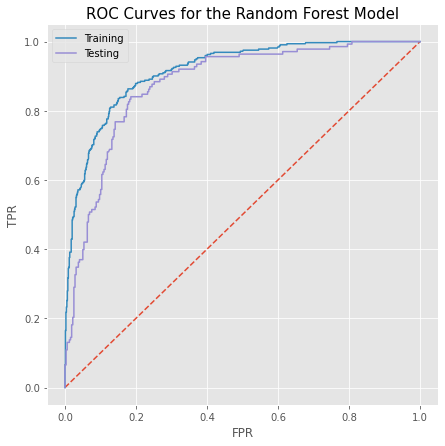

In [150]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train,
                                    rf_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the Random Forest Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure26.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [151]:
print(
    "Classification report of the train data for the Random Forest model:"
)
print(classification_report(y_train, rf_model.predict(X_train)))

Classification report of the train data for the Random Forest model:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       739
           1       0.80      0.70      0.75       322

    accuracy                           0.85      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [152]:
print(
    "Classification report of the test data for the Random Forest model:"
)
print(classification_report(y_test, rf_model.predict(X_test)))

Classification report of the test data for the Random Forest model:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       318
           1       0.71      0.66      0.68       138

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



### Performance Metrics for AdaBoost Model.

#### Accuracy Score for Training and Testing

In [153]:
print(
    f"Training Accuracy score for the AdaBoost model: {accuracy_score(y_train, ada_model.predict(X_train)):.3f}"
)

Training Accuracy score for the AdaBoost model: 0.852


In [154]:
print(
    f"Testing Accuracy score for the AdaBoost model: {accuracy_score(y_test, ada_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the AdaBoost model: 0.811


#### Confusion Matrix for Training and Testing

In [155]:
print("Confusion matrix of the train set for the AdaBoost model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, ada_model.predict(X_train)))}")

Confusion matrix of the train set for the AdaBoost model:
     0    1
0  676   63
1   94  228


In [156]:
print("Confusion matrix of the test set for the AdaBoost model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, ada_model.predict(X_test)))}")

Confusion matrix of the test set for the AdaBoost model:
     0   1
0  278  40
1   46  92


#### ROC AUC Score and the ROC for Training and Testing

In [157]:
print(
    f"ROC AUC score of train data for the AdaBoost' model: {roc_auc_score(y_train, ada_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the AdaBoost model: {roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the AdaBoost' model: 0.911
ROC AUC score of test data for the AdaBoost model: 0.883


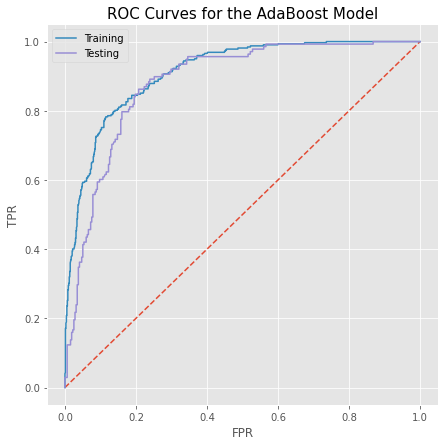

In [158]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train,
                                    ada_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, ada_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the AdaBoost Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure27.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [159]:
print(
    "Classification report of the train data for the AdaBoost model:"
)
print(classification_report(y_train, ada_model.predict(X_train)))

Classification report of the train data for the AdaBoost model:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       739
           1       0.78      0.71      0.74       322

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [160]:
print(
    "Classification report of the test data for the AdaBoost model:"
)
print(classification_report(y_test, ada_model.predict(X_test)))

Classification report of the test data for the AdaBoost model:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       318
           1       0.70      0.67      0.68       138

    accuracy                           0.81       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



### Performance Metrics for Gradient Boosting Model.

#### Accuracy Score for Training and Testing

In [161]:
print(
    f"Training Accuracy score for the Gradient Boosting model: {accuracy_score(y_train, gb_model.predict(X_train)):.3f}"
)

Training Accuracy score for the Gradient Boosting model: 0.857


In [162]:
print(
    f"Testing Accuracy score for the Gradient Boosting model: {accuracy_score(y_test, gb_model.predict(X_test)):.3f}"
)

Testing Accuracy score for the Gradient Boosting model: 0.827


#### Confusion Matrix for Training and Testing

In [163]:
print("Confusion matrix of the train set for the Gradient Boosting model:")
print(f"{pd.DataFrame(confusion_matrix(y_train, gb_model.predict(X_train)))}")

Confusion matrix of the train set for the Gradient Boosting model:
     0    1
0  678   61
1   91  231


In [164]:
print("Confusion matrix of the test set for the Gradient Boosting model:")
print(f"{pd.DataFrame(confusion_matrix(y_test, gb_model.predict(X_test)))}")

Confusion matrix of the test set for the Gradient Boosting model:
     0   1
0  278  40
1   39  99


#### ROC AUC Score and the ROC for Training and Testing

In [165]:
print(
    f"ROC AUC score of train data for the Gradient Boosting' model: {roc_auc_score(y_train, gb_model.predict_proba(X_train)[:, 1]):.3f}"
)
print(
    f"ROC AUC score of test data for the Gradient Boosting model: {roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]):.3f}"
)

ROC AUC score of train data for the Gradient Boosting' model: 0.923
ROC AUC score of test data for the Gradient Boosting model: 0.889


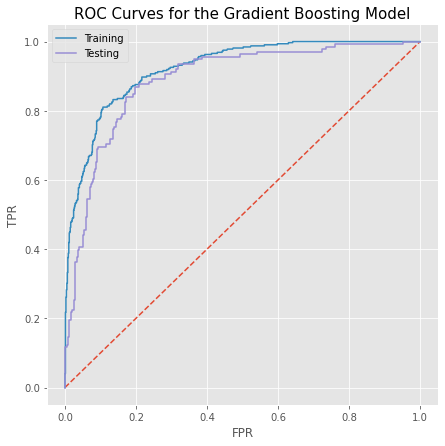

In [166]:
plt.figure(figsize=(7, 7))
fpr_train, tpr_train, _ = roc_curve(y_train,
                                    gb_model.predict_proba(X_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr_train, tpr_train, label="Training")
plt.plot(fpr_test, tpr_test, label="Testing")
plt.legend()
plt.title("ROC Curves for the Gradient Boosting Model", size=15)
plt.xlabel("FPR")
plt.ylabel("TPR");
# plt.savefig("images/Figure28.svg", bbox_inches="tight");

#### Classification Reports for Training and Testing

In [167]:
print(
    "Classification report of the train data for the Gradient Boosting model:"
)
print(classification_report(y_train, gb_model.predict(X_train)))

Classification report of the train data for the Gradient Boosting model:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       739
           1       0.79      0.72      0.75       322

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.85      0.86      0.85      1061



In [168]:
print(
    "Classification report of the test data for the Gradient Boosting model:"
)
print(classification_report(y_test, gb_model.predict(X_test)))

Classification report of the test data for the Gradient Boosting model:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       318
           1       0.71      0.72      0.71       138

    accuracy                           0.83       456
   macro avg       0.79      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



### Comparison of the models.

In [169]:
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
train_auc = []
models = [
    lr_model, lda_model, knn_model, nb_model, bag_model, rf_model, ada_model,
    gb_model
]

for model in models:
    if model == knn_model:
        train_accuracies.append(
            accuracy_score(y_train, model.predict(X_train_scaled)))
        train_precisions.append(
            precision_score(y_train, model.predict(X_train_scaled)))
        train_recalls.append(
            recall_score(y_train, model.predict(X_train_scaled)))
        train_f1_scores.append(f1_score(y_train,
                                        model.predict(X_train_scaled)))
        train_auc.append(
            roc_auc_score(y_train,
                          model.predict_proba(X_train_scaled)[:, 1]))
    else:
        train_accuracies.append(accuracy_score(y_train,
                                               model.predict(X_train)))
        train_precisions.append(
            precision_score(y_train, model.predict(X_train)))
        train_recalls.append(recall_score(y_train, model.predict(X_train)))
        train_f1_scores.append(f1_score(y_train, model.predict(X_train)))
        train_auc.append(
            roc_auc_score(y_train,
                          model.predict_proba(X_train)[:, 1]))

In [170]:
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []
test_auc = []

for model in models:
    if model == knn_model:
        test_accuracies.append(
            accuracy_score(y_test, model.predict(X_test_scaled)))
        test_precisions.append(
            precision_score(y_test, model.predict(X_test_scaled)))
        test_recalls.append(
            recall_score(y_test, model.predict(X_test_scaled)))
        test_f1_scores.append(f1_score(y_test, model.predict(X_test_scaled)))
        test_auc.append(
            roc_auc_score(y_test,
                          model.predict_proba(X_test_scaled)[:, 1]))
    else:
        test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))
        test_precisions.append(precision_score(y_test,
                                               model.predict(X_test)))
        test_recalls.append(recall_score(y_test, model.predict(X_test)))
        test_f1_scores.append(f1_score(y_test, model.predict(X_test)))
        test_auc.append(
            roc_auc_score(y_test,
                          model.predict_proba(X_test)[:, 1]))

In [171]:
train_metrics = pd.DataFrame(
    data={
        "Accuracy": train_accuracies,
        "Precision": train_precisions,
        "Recall": train_recalls,
        "F1-score": train_f1_scores,
        "AUC-score": train_auc,
    },
    index=[
        "LR Model", "LDA Model", "KNN Model", "Naive Bayes' Model",
        "Bagging Classifier Model", "RF Model", "AdaBoost Model",
        "Gradient Boosting Model"
    ],
)
round(train_metrics, 3)

,Accuracy,Precision,Recall,F1-score,AUC-score
LR Model,0.844,0.783,0.671,0.722,0.894
LDA Model,0.842,0.766,0.689,0.725,0.894
KNN Model,0.855,0.792,0.708,0.748,0.920
Naive Bayes' Model,0.835,0.738,0.708,0.723,0.890
Bagging Classifier Model,0.849,0.814,0.652,0.724,0.910
RF Model,0.855,0.796,0.702,0.746,0.916
AdaBoost Model,0.852,0.784,0.708,0.744,0.911
Gradient Boosting Model,0.857,0.791,0.717,0.752,0.923


In [172]:
test_metrics = pd.DataFrame(
    data={
        "Accuracy": test_accuracies,
        "Precision": test_precisions,
        "Recall": test_recalls,
        "F1-score": test_f1_scores,
        "AUC-score": test_auc,
    },
    index=[
        "LR Model", "LDA Model", "KNN Model", "Naive Bayes' Model",
        "Bagging Classifier Model", "RF Model", "AdaBoost Model",
        "Gradient Boosting Model"
    ],
)
round(test_metrics, 3)

,Accuracy,Precision,Recall,F1-score,AUC-score
LR Model,0.807,0.687,0.667,0.676,0.876
LDA Model,0.807,0.679,0.688,0.683,0.873
KNN Model,0.822,0.711,0.696,0.703,0.869
Naive Bayes' Model,0.820,0.689,0.739,0.713,0.877
Bagging Classifier Model,0.811,0.717,0.623,0.667,0.880
RF Model,0.814,0.705,0.659,0.682,0.878
AdaBoost Model,0.811,0.697,0.667,0.681,0.883
Gradient Boosting Model,0.827,0.712,0.717,0.715,0.889


# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

In [173]:
import nltk
import string
# nltk.download('inaugural')
from nltk.corpus import inaugural

## Speeches Dataset

In [174]:
roosevelt = inaugural.raw('1941-Roosevelt.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')

all_speeches = [roosevelt, kennedy, nixon]

In [175]:
df = pd.DataFrame(data=all_speeches, index=["Roosevelt", "Kennedy", "Nixon"], columns=["Speech"])
df

,Speech
Roosevelt,On each national day of inauguration since 178...
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [176]:
words_list = [
    inaugural.words('1941-Roosevelt.txt'),
    inaugural.words('1961-Kennedy.txt'),
    inaugural.words('1973-Nixon.txt')
]
sents_list = [
    inaugural.sents('1941-Roosevelt.txt'),
    inaugural.sents('1961-Kennedy.txt'),
    inaugural.sents('1973-Nixon.txt')
]

df["Word Count"] = [len(words) for words in words_list]
df["Character Count"] = df["Speech"].replace(" ", "", regex=True).apply(len)
df["Sentence Count"] = [len(sents) for sents in sents_list]
df

,Speech,Word Count,Character Count,Sentence Count
Roosevelt,On each national day of inauguration since 178...,1536,6249,68
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,6255,52
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,8223,69


In [177]:
for i in range(df.shape[0]):
    print(f"President {df.index[i]}'s speech has {df.iloc[i, 1]} words, {df.iloc[i, 2]} characters and {df.iloc[i, 3]} sentences.")

President Roosevelt's speech has 1536 words, 6249 characters and 68 sentences.
President Kennedy's speech has 1546 words, 6255 characters and 52 sentences.
President Nixon's speech has 2028 words, 8223 characters and 69 sentences.


## 2.2 Remove all the stopwords from all three speeches.

### Converting the text to lowercase

In [178]:
df["Clean Speech"] = df["Speech"].str.lower()
df[["Speech", "Clean Speech"]]

,Speech,Clean Speech
Roosevelt,On each national day of inauguration since 178...,on each national day of inauguration since 178...
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...","vice president johnson, mr. speaker, mr. chief..."
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...","mr. vice president, mr. speaker, mr. chief jus..."


### Removing Stopwords and Punctuations

In [179]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['know', 'let', 'us']

In [180]:
df["Clean Speech"] = df["Clean Speech"].apply(lambda x: " ".join(word for word in x.split() if word not in stopwords))

In [181]:
for i in list(string.punctuation):
    df["Clean Speech"] = df["Clean Speech"].str.replace(i, "")

In [182]:
df[["Speech", "Clean Speech"]]

,Speech,Clean Speech
Roosevelt,On each national day of inauguration since 178...,national day inauguration since 1789 people re...
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",vice president johnson mr speaker mr chief jus...
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",mr vice president mr speaker mr chief justice ...


In [183]:
df["Before Word Count"] = df["Word Count"]
df["After Word Count"] = df["Clean Speech"].str.split(" ").apply(len)

In [184]:
df[["Speech", "Before Word Count", "After Word Count"]]

,Speech,Before Word Count,After Word Count
Roosevelt,On each national day of inauguration since 178...,1536,648
Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1546,701
Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",2028,814


In [185]:
# Sample sentence before removing stopwords.
df.loc["Roosevelt", "Speech"][:120]

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.'

In [186]:
# Sample sentence after removing stopwords.
df.loc["Roosevelt", "Clean Speech"][:82]

'national day inauguration since 1789 people renewed sense dedication united states'

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [187]:
# Three most common words in President Roosevelt's speech:
nltk.FreqDist(df.loc["Roosevelt", "Clean Speech"].split()).most_common(3)

[('nation', 11), ('spirit', 9), ('democracy', 9)]

In [188]:
# Three most common words in President Kennedy's speech:
nltk.FreqDist(df.loc["Kennedy", "Clean Speech"].split()).most_common(3)

[('world', 8), ('sides', 8), ('new', 7)]

In [189]:
# Three most common words in President Nixon's speech:
nltk.FreqDist(df.loc["Nixon", "Clean Speech"].split()).most_common(3)

[('peace', 19), ('world', 16), ('new', 15)]

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [190]:
from wordcloud import WordCloud

### Word cloud for President Roosevelt's speech

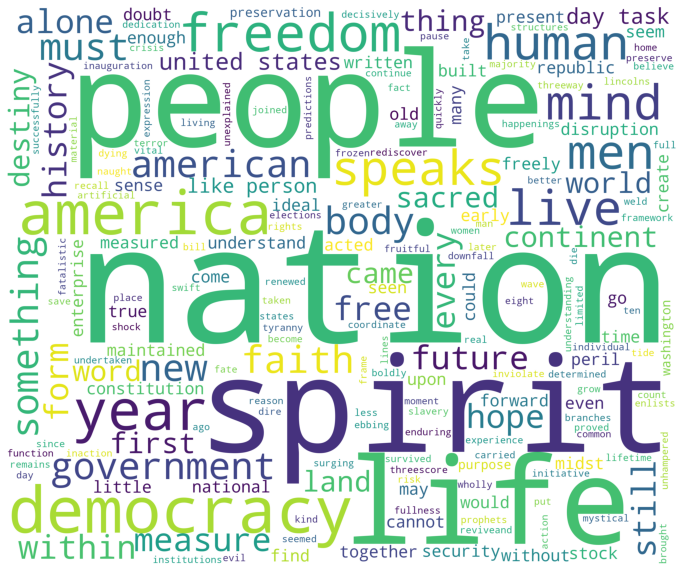

In [191]:
wordcloud = WordCloud(stopwords=stopwords,
                      width=3000,
                      height=2500,
                      background_color="white",
                      mode="RGBA").generate(df.loc["Roosevelt",
                                                   "Clean Speech"])
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off');
# plt.savefig("images/Figure29.svg", bbox_inches="tight");

### Word cloud for President Kennedy's speech

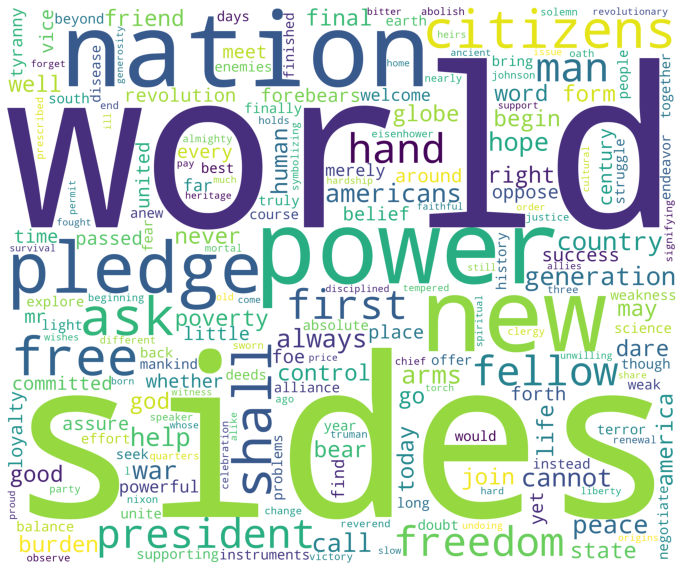

In [192]:
wordcloud = WordCloud(stopwords=stopwords,
                      width=3000,
                      height=2500,
                      background_color="white",
                      mode="RGBA").generate(df.loc["Kennedy",
                                                   "Clean Speech"])
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off');
# plt.savefig("images/Figure30.svg", bbox_inches="tight");

### Word cloud for President Nixon's speech

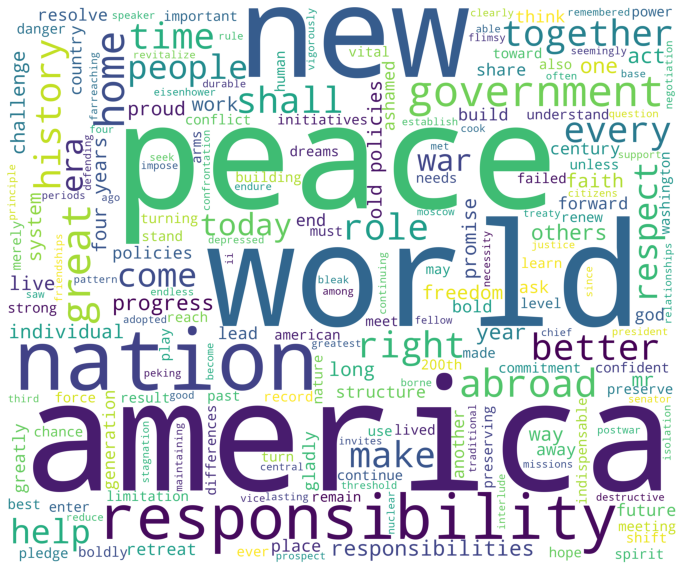

In [193]:
wordcloud = WordCloud(stopwords=stopwords,
                      width=3000,
                      height=2500,
                      background_color="white",
                      mode="RGBA").generate(df.loc["Nixon",
                                                   "Clean Speech"])
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off');
# plt.savefig("images/Figure31.svg", bbox_inches="tight");